In [1]:
!pip install pandas google-cloud-bigquery
!pip install pandas-gbq
import pandas as pd
from google.oauth2 import service_account
import pandas as pd
import pandas_gbq as gbq
credentials_path = '../token.json'

# Authenticate with your credentials
credentials = service_account.Credentials.from_service_account_file(
    credentials_path, scopes=['https://www.googleapis.com/auth/bigquery'])

# Set the credentials for pandas_gbq
gbq.context.credentials = credentials

In [1]:
from pandas_gbq import read_gbq
merged_data = read_gbq(f"""
SELECT *
FROM `capstone-398012.capstone.CRI_Merged`

""",project_id='capstone-398012', dialect='standard')

c:\Documents\Capstone\.venv\lib\site-packages\google\cloud\bigquery\table.py:2155: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


In [11]:
merged_data

,CompanyNumber,yyyy,mm,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,lqfintrend,DTDmedianFin,DTDmedianNonFin,dummy297fin,EventDate,EventDate_string,Value,StartDate,Duration,EventType
310385,7998,1988.0,1,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,0.000000,1.0,1988-01-01 00:00:00+00:00,1988 01,8.845833,1988-01-29 00:00:00+00:00,-28 days,0.0
2389391,7998,1988.0,10,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,0.000000,1.0,1988-10-01 00:00:00+00:00,1988 10,8.845833,1988-01-29 00:00:00+00:00,246 days,0.0
1797927,7998,1988.0,11,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,0.000000,1.0,1988-11-01 00:00:00+00:00,1988 11,8.845833,1988-01-29 00:00:00+00:00,277 days,0.0
1515397,7998,1988.0,12,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,0.000000,1.0,1988-12-01 00:00:00+00:00,1988 12,8.845833,1988-01-29 00:00:00+00:00,307 days,0.0
644549,7998,1988.0,2,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,NaN,0.000000,1.0,1988-02-01 00:00:00+00:00,1988 02,8.845833,1988-01-29 00:00:00+00:00,3 days,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721920,212228,2023.0,7,0.110445,0.009928,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,3.244875,0.0,2023-07-01 00:00:00+00:00,2023 07,4.211667,2023-07-25 00:00:00+00:00,-24 days,0.0
489920,212229,2023.0,7,0.110445,0.009928,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,3.244875,0.0,2023-07-01 00:00:00+00:00,2023 07,4.211667,2023-07-25 00:00:00+00:00,-24 days,0.0
798345,212230,2023.0,7,0.110445,0.009928,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,3.244875,0.0,2023-07-01 00:00:00+00:00,2023 07,4.211667,2023-07-25 00:00:00+00:00,-24 days,0.0
2029775,212250,2023.0,7,0.110445,0.009928,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,3.244875,0.0,2023-07-01 00:00:00+00:00,2023 07,4.211667,2023-07-27 00:00:00+00:00,-26 days,0.0


In [28]:
# #list of columns that contain NA 
# na_cols = ['liqnonfinlevel', 'liqnonfintrend', 'dtdlevel', 'dtdtrend', 'DTDmedianNonFin', 'DTDmedianFin', 'sigma', 'StkIndx']

# new_df = merged_data.copy()
# new_df['EventType'] = new_df['EventType'].map(lambda x : 0 if x ==2  else x)
# #create new columns (_notNA) for each column that contains na values where 1 if original column is not na and 0 otherwise
# for col in na_cols:
#     new_col = col + '_notNA'
#     new_df[new_col] = new_df[col].notna().astype(int)

# grouped_df = new_df.groupby('CompanyNumber')
# grouped_df[na_cols].mean()
# mean_values = grouped_df[na_cols].transform('mean')

# new_df[na_cols] = new_df[na_cols].fillna(mean_values)
# print(new_df['EventType'].sum())
# new_df.isna().sum().sort_values(ascending=False)
# print(new_df['EventType'].sum())

# new_df = new_df.dropna()

16252.0
16252.0


In [8]:
merged_data.isna().sum()

CompanyNumber            0
yyyy                 19571
mm                   19571
StkIndx              66614
STInt                36889
dtdlevel            435285
dtdtrend            435285
liqnonfinlevel      333045
liqnonfintrend      333045
ni2talevel          315340
ni2tatrend          315340
sizelevel           180306
sizetrend           180306
m2b                 323843
sigma               309311
liqfinlevel          84390
lqfintrend           84390
DTDmedianFin         49489
DTDmedianNonFin     146258
dummy297fin          19571
EventDate            19571
EventDate_string         0
Value                19571
StartDate            19571
Duration                 0
EventType                0
dtype: int64

In [3]:
# data = ['CompanyNumber', 'yyyy', 'mm', 'ni2talevel','ni2tatrend', 'sizelevel', 'sizetrend', 'm2b']
merged_data.sort_values(by=['CompanyNumber', 'yyyy', 'mm'], inplace=True)   

In [22]:
merged_data_rolling_df = merged_data.copy()

def roll(dataframe, level_variables, trend_variables, window, periods):
    def rolling_average_with_min_count(series):
        rolling_window = series.rolling(window=window, min_periods=periods)
        return rolling_window.mean()

    for level in level_variables:
        imputed_column = dataframe.groupby('CompanyNumber')[level].apply(rolling_average_with_min_count)
        dataframe[level + '_imputed'] = imputed_column.reset_index(level=0, drop=True)
        dataframe[level].fillna(dataframe[level + '_imputed'], inplace=True)

    

level_variables = ['dtdlevel',
       'liqnonfinlevel', 'ni2talevel',
       'sizelevel','m2b', 'sigma', 'liqfinlevel',
       ]


trend_variables = ['dtdtrend', 'liqnonfintrend', 'ni2tatrend', 'sizetrend', 'lqfintrend', 'DTDmedianFin', 'DTDmedianNonFin']
# Loop through each 'level' variable and apply the imputation logic
roll(merged_data_rolling_df, level_variables, 12, 6)


In [23]:
merged_data_rolling_df.isna().sum()

CompanyNumber                   0
yyyy                        19571
mm                          19571
StkIndx                     47209
STInt                       17476
dtdlevel                   402698
dtdtrend                   402698
liqnonfinlevel             306628
liqnonfintrend             306628
ni2talevel                 286849
ni2tatrend                 286849
sizelevel                  155761
sizetrend                  155761
m2b                        291286
sigma                      275695
liqfinlevel                 62481
lqfintrend                  62481
DTDmedianFin                30083
DTDmedianNonFin            126912
dummy297fin                 19571
EventDate                   19571
EventDate_string                0
Value                       19571
StartDate                   19571
Duration                        0
EventType                       0
StkIndx_imputed            163618
STInt_imputed              133919
dtdlevel_imputed           512990
dtdtrend_imput

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
numerical = ['StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin']
categorical= [
 'liqnonfinlevel_notNA',
 'liqnonfintrend_notNA',
 'dtdlevel_notNA',
 'dtdtrend_notNA',
 'DTDmedianNonFin_notNA',
 'DTDmedianFin_notNA',
 'sigma_notNA',
 'StkIndx_notNA']
y = new_df['EventType']
X = new_df.drop(['EventType', 'CompanyNumber', 'yyyy', 'mm'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical]), columns=numerical)
X_train_scaled.index = X_train.index
X_train_scaled = pd.concat([X_train_scaled, X_train[categorical]] ,axis=1)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical]), columns=numerical)
X_test_scaled.index = X_test.index
X_test_scaled = pd.concat([X_test_scaled, X_test[categorical]], axis=1)


In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your dataset
# Example: Replace this with your own data
# X = pd.DataFrame(np.random.rand(10, 10), columns=["Var1", "Var2", "Var3", "Var4", "Var5", "Var6", "Var7", "Var8", "Var9", "Var10"])


correlation = X.corr()
correlation_styled = correlation.style.background_gradient(cmap='Greens').format("{:.2f}")
correlation_styled

/var/folders/4k/6rq2dc2j4w9fvhjkkjt2x0mr0000gn/T/ipykernel_2474/1467446278.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = X.corr()


,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,m2b,sigma,liqfinlevel,lqfintrend,DTDmedianFin,DTDmedianNonFin,dummy297fin,liqnonfinlevel_notNA,liqnonfintrend_notNA,dtdlevel_notNA,dtdtrend_notNA,DTDmedianNonFin_notNA,DTDmedianFin_notNA,sigma_notNA,StkIndx_notNA
StkIndx,1.00,0.17,0.01,0.09,0.00,0.04,0.03,0.02,0.03,0.05,0.01,-0.08,0.01,0.00,0.03,0.17,-0.00,-0.02,-0.02,-0.03,-0.03,-0.03,-0.01,0.01,-0.00
STInt,0.17,1.00,-0.05,-0.01,0.01,-0.01,0.07,-0.01,0.02,0.05,-0.02,0.06,0.01,-0.01,-0.10,-0.09,-0.02,-0.15,-0.15,-0.30,-0.30,-0.35,-0.14,-0.03,-0.05
dtdlevel,0.01,-0.05,1.00,-0.26,0.04,-0.02,0.08,-0.00,0.16,0.02,0.02,-0.29,-0.15,-0.06,0.11,0.00,0.06,0.01,0.01,-0.01,-0.01,0.00,0.01,0.01,0.00
dtdtrend,0.09,-0.01,-0.26,1.00,0.00,0.09,0.01,0.02,0.02,0.16,0.00,-0.04,0.03,-0.02,0.00,0.04,-0.01,-0.00,-0.00,0.00,0.00,-0.01,-0.01,0.01,-0.00
liqnonfinlevel,0.00,0.01,0.04,0.00,1.00,-0.09,0.07,-0.03,-0.08,-0.04,-0.01,0.05,0.32,0.01,-0.33,0.32,-0.36,0.01,0.01,0.00,0.00,-0.02,0.04,0.05,-0.01
liqnonfintrend,0.04,-0.01,-0.02,0.09,-0.09,1.00,0.04,0.14,0.04,0.09,-0.04,-0.05,-0.03,-0.00,0.03,-0.01,0.03,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,-0.00
ni2talevel,0.03,0.07,0.08,0.01,0.07,0.04,1.00,-0.19,0.22,0.01,-0.44,-0.33,-0.06,-0.01,0.06,-0.03,0.07,-0.02,-0.02,0.02,0.02,-0.03,-0.01,0.10,-0.01
ni2tatrend,0.02,-0.01,-0.00,0.02,-0.03,0.14,-0.19,1.00,-0.00,0.06,-0.03,0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.01,-0.00
sizelevel,0.03,0.02,0.16,0.02,-0.08,0.04,0.22,-0.00,1.00,0.03,-0.02,-0.56,-0.02,0.00,0.01,-0.00,0.01,0.05,0.05,0.06,0.06,0.01,-0.01,0.17,0.01
sizetrend,0.05,0.05,0.02,0.16,-0.04,0.09,0.01,0.06,0.03,1.00,0.16,-0.02,-0.01,0.00,0.02,-0.02,0.02,-0.02,-0.02,-0.06,-0.06,-0.07,-0.01,-0.02,-0.00


## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
class_weights = {0:1, 1:70}
model = LogisticRegression(class_weight = class_weights)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
coefficients = model.coef_
intercept = model.intercept_


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

/Users/thomastan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean Squared Error: 0.10238212411596542
R-squared: -11.630627646951
Confusion Matrix:
[[322339  36399]
 [   632   2324]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95    358738
         1.0       0.06      0.79      0.11      2956

    accuracy                           0.90    361694
   macro avg       0.53      0.84      0.53    361694
weighted avg       0.99      0.90      0.94    361694



## Linear Regression


In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Mean Squared Error: 0.007851535670191949
R-squared: 0.03137560034775766
Coefficients: [-9.56030836e-04 -4.30798017e-04 -1.57564983e-03 -3.12835341e-04
 -4.99261401e-03 -2.32972769e-03  6.22869427e-04 -6.56557656e-04
 -4.26026243e-04 -1.19601800e-02 -3.64831341e-04  7.39526317e-03
 -1.87726584e-03 -9.39294859e-05  7.58547074e-04  1.36950850e-03
 -3.66875266e-03 -9.72413326e+10  9.72413326e+10  1.09468945e+10
 -1.09468945e+10 -1.81058166e-03 -3.00943736e-03  1.19479756e-02
  5.86656244e-03]
Intercept: -0.013740944982991323


## Deep Hit

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lifelines.utils import concordance_index
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model

# Assuming you have X_train_scaled, X_test_scaled, y_train, and y_test ready

# Define shared representation network (for static features)
static_input = Input(shape=(X_train_scaled.shape[1],))
shared_layer_1 = Dense(64, activation='relu')(static_input)
shared_layer_2 = Dense(32, activation='relu')(shared_layer_1)

# Define time prediction network (for dynamic features)
dynamic_input = Input(shape=(X_train_scaled.shape[1],))
time_layer_1 = Dense(64, activation='relu')(dynamic_input)
time_layer_2 = Dense(32, activation='relu')(time_layer_1)

# Concatenate shared and time networks
merged = Concatenate()([shared_layer_2, time_layer_2])

# Event prediction network
event_layer = Dense(32, activation='relu')(merged)
output = Dense(1, activation='linear')(event_layer)  # Linear activation for survival analysis

# Create the DeepHit model
model = Model(inputs=[static_input, dynamic_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(
    [X_train_scaled, X_train_scaled], y_train,
    epochs=50,
    batch_size=32,
    validation_data=([X_test_scaled, X_test_scaled], y_test)
)

# Predictions
predictions = model.predict([X_test_scaled, X_test_scaled])

# Calculate C-index
c_index = concordance_index(y_test, -predictions)
print(f'C-index: {c_index}')


Epoch 1/50
45212/45212 [==============================] - 44s 955us/step - loss: 0.0073 - val_loss: 0.0072
Epoch 2/50
45212/45212 [==============================] - 42s 937us/step - loss: 0.0070 - val_loss: 0.0071
Epoch 3/50
45212/45212 [==============================] - 42s 938us/step - loss: 0.0069 - val_loss: 0.0070
Epoch 4/50
45212/45212 [==============================] - 41s 906us/step - loss: 0.0069 - val_loss: 0.0070
Epoch 5/50
45212/45212 [==============================] - 43s 954us/step - loss: 0.0068 - val_loss: 0.0070
Epoch 6/50
45212/45212 [==============================] - 41s 911us/step - loss: 0.0068 - val_loss: 0.0070
Epoch 7/50
45212/45212 [==============================] - 41s 915us/step - loss: 0.0068 - val_loss: 0.0072
Epoch 8/50
45212/45212 [==============================] - 41s 900us/step - loss: 0.0068 - val_loss: 0.0070
Epoch 9/50
45212/45212 [==============================] - 41s 899us/step - loss: 0.0068 - val_loss: 0.0070
Epoch 10/50
45212/45212 [============

## Principle Componenet Analysis Regression


In [68]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Create a PCA regression pipeline
pca = PCA(n_components=14)  # Number of principal components to keep
class_weights = {0:1, 1:70}
model = LogisticRegression(class_weight = class_weights)
pipeline = Pipeline([
    ('pca', pca),
    ('regression', model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test_scaled)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
coefficients = model.coef_
intercept = model.intercept_


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

Mean Squared Error: 0.12762445603189437
R-squared: -14.744711263830443
Confusion Matrix:
[[313751  44987]
 [  1174   1782]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93    358738
         1.0       0.04      0.60      0.07      2956

    accuracy                           0.87    361694
   macro avg       0.52      0.74      0.50    361694
weighted avg       0.99      0.87      0.92    361694



In [69]:
X_train_scaled.shape

(1446772, 25)

Working on 5
5 0.016982130686959862
Working on 6
6 0.017248241018790522
Working on 7
7 0.017687321086068408
Working on 8
8 0.025411498752538564
Working on 9
9 0.027481248119982205
Working on 10
10 0.028035868750128423
Working on 11
11 0.02803387343339392
Working on 12
12 0.02877792404024282
Working on 13
13 0.02941468939244285
Working on 14
14 0.030628061002807683
Working on 15
15 0.03076540693077301
Working on 16
16 0.03084243231969075
Working on 17
17 0.03088670849534303
Working on 18
18 0.030950624575822316
Working on 19
19 0.031082028198391565
Working on 20
20 0.031368707774579785
Working on 21
21 0.03137666986095433
Working on 22
22 0.03137644998954925
Working on 23
23 0.03137802544047197


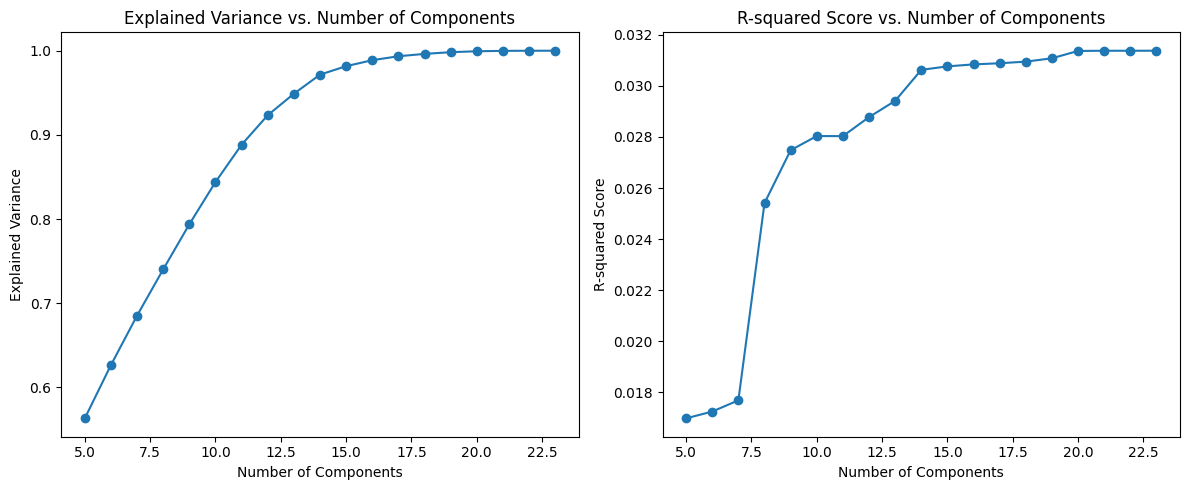

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
components_range = range(5,24)  # Consider 1 to n_components

# Initialize lists to store explained variance and regression scores
explained_variance = []
r2_scores = []

for n_components in components_range:
    print("Working on " + str(n_components))
    # Apply PCA with the current number of components
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Create a linear regression model
    regression_model = LinearRegression()

    # Fit the regression model to the reduced-dimensional training data
    regression_model.fit(X_train_pca, y_train)

    # Make predictions on the reduced-dimensional test data
    y_pred = regression_model.predict(X_test_pca)

    # Calculate and store explained variance and R-squared score
    explained_variance.append(np.sum(pca.explained_variance_ratio_))
    print(str(n_components), str(r2_score(y_test,y_pred)))
    r2_scores.append(r2_score(y_test, y_pred))

# Plot explained variance and R-squared as functions of the number of components
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(components_range, explained_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance vs. Number of Components")

plt.subplot(1, 2, 2)
plt.plot(components_range, r2_scores, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("R-squared Score")
plt.title("R-squared Score vs. Number of Components")

plt.tight_layout()
plt.show()


Working on 5
Working on 6
Working on 7
Working on 8
Working on 9
Working on 10
Working on 11
Working on 12
Working on 13
Working on 14
Working on 15
Working on 16
Working on 17
Working on 18
Working on 19
Working on 20
Working on 21
Working on 22


/Users/thomastan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Working on 23


/Users/thomastan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


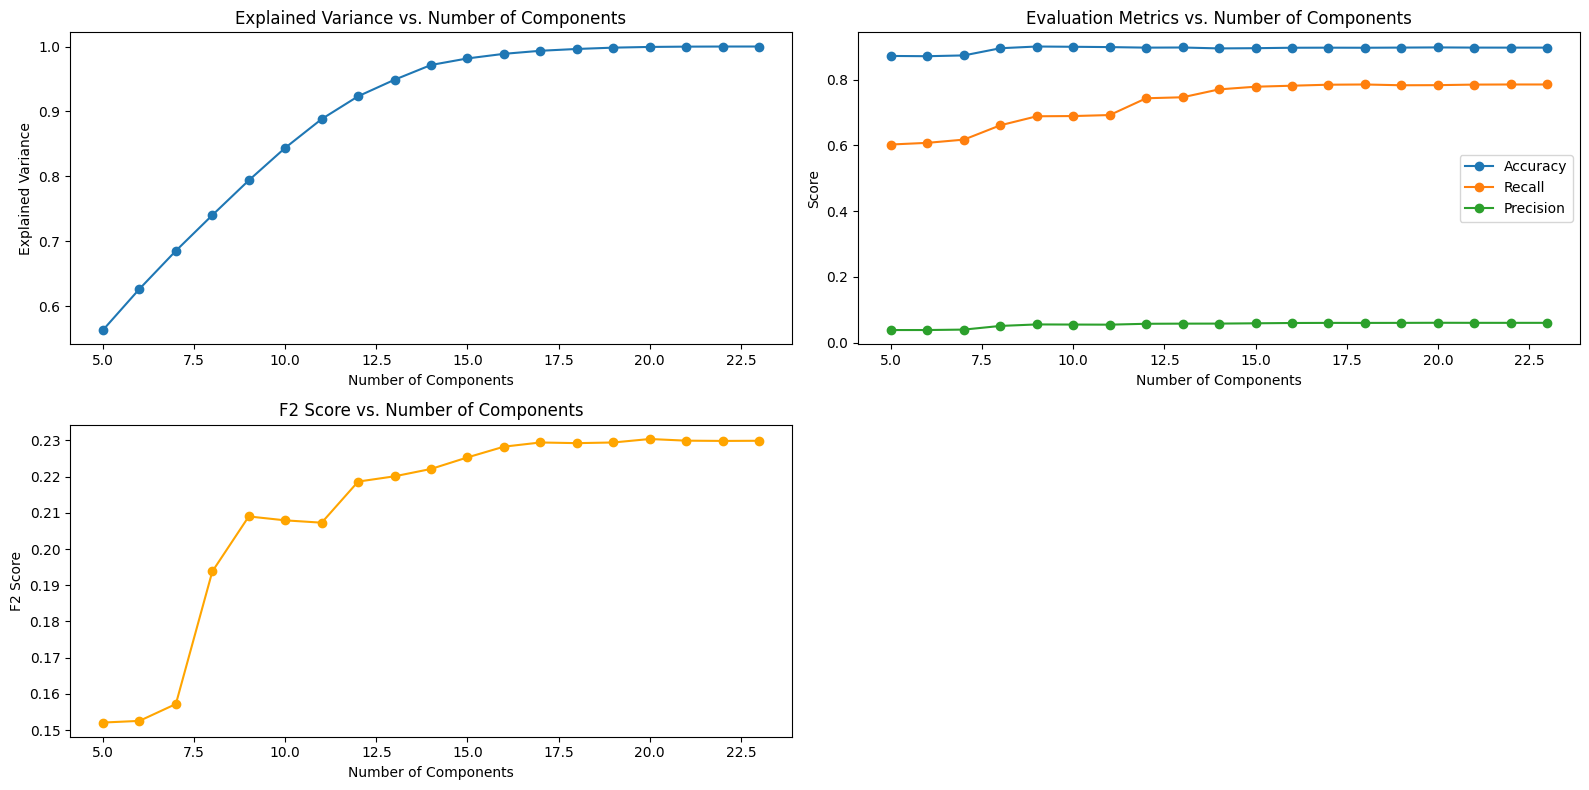

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, fbeta_score



# Initialize lists to store explained variance and evaluation metrics
components_range = range(5,24)  # Consider 1 to n_components
explained_variance = []
accuracy_scores = []
recall_scores = []
precision_scores = []
f2_scores = []

for n_components in components_range:
    print("Working on " + str(n_components))
    # Apply PCA with the current number of components
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    class_weights = {0:1, 1:70}
    # Create a logistic regression model
    logistic_regression_model =LogisticRegression(class_weight = class_weights)

    # Fit the logistic regression model to the reduced-dimensional training data
    logistic_regression_model.fit(X_train_pca, y_train)

    # Make predictions on the reduced-dimensional test data
    y_pred = logistic_regression_model.predict(X_test_pca)

    # Calculate and store explained variance and evaluation metrics
    explained_variance.append(np.sum(pca.explained_variance_ratio_))
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    f2_scores.append(fbeta_score(y_test, y_pred, beta=2))

# Plot explained variance and evaluation metrics as functions of the number of components
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.plot(components_range, explained_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance vs. Number of Components")

plt.subplot(2, 2, 2)
plt.plot(components_range, accuracy_scores, marker='o', label='Accuracy')
plt.plot(components_range, recall_scores, marker='o', label='Recall')
plt.plot(components_range, precision_scores, marker='o', label='Precision')
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.title("Evaluation Metrics vs. Number of Components")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(components_range, f2_scores, marker='o', color='orange', label='F2 Score')
plt.xlabel("Number of Components")
plt.ylabel("F2 Score")
plt.title("F2 Score vs. Number of Components")

plt.tight_layout()
plt.show()


In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lifelines.utils import concordance_index
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model

# Assuming you have X_train_scaled, X_test_scaled, y_train, and y_test ready

# Define shared representation network (for static features)
static_input = Input(shape=(X_train_pca.shape[1],))
shared_layer_1 = Dense(64, activation='relu')(static_input)
shared_layer_2 = Dense(32, activation='relu')(shared_layer_1)

# Define time prediction network (for dynamic features)
dynamic_input = Input(shape=(X_train_pca.shape[1],))
time_layer_1 = Dense(64, activation='relu')(dynamic_input)
time_layer_2 = Dense(32, activation='relu')(time_layer_1)

# Concatenate shared and time networks
merged = Concatenate()([shared_layer_2, time_layer_2])

# Event prediction network
event_layer = Dense(32, activation='relu')(merged)
output = Dense(1, activation='linear')(event_layer)  # Linear activation for survival analysis

# Create the DeepHit model
model = Model(inputs=[static_input, dynamic_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(
    [X_train_pca, X_train_pca], y_train,
    epochs=50,
    batch_size=32,
    validation_data=([X_test_pca, X_test_pca], y_test)
)

# Predictions
predictions = model.predict([X_test_pca, X_test_pca])

# Calculate C-index
c_index = concordance_index(y_test, -predictions)
print(f'C-index: {c_index}')


Epoch 1/50
45212/45212 [==============================] - 39s 860us/step - loss: 0.0072 - val_loss: 0.0072
Epoch 2/50
45212/45212 [==============================] - 38s 833us/step - loss: 0.0069 - val_loss: 0.0071
Epoch 3/50
45212/45212 [==============================] - 37s 825us/step - loss: 0.0069 - val_loss: 0.0070
Epoch 4/50
45212/45212 [==============================] - 37s 827us/step - loss: 0.0068 - val_loss: 0.0070
Epoch 5/50
45212/45212 [==============================] - 38s 830us/step - loss: 0.0068 - val_loss: 0.0070
Epoch 6/50
45212/45212 [==============================] - 38s 839us/step - loss: 0.0068 - val_loss: 0.0069
Epoch 7/50
45212/45212 [==============================] - 38s 836us/step - loss: 0.0068 - val_loss: 0.0069
Epoch 8/50
45212/45212 [==============================] - 38s 835us/step - loss: 0.0067 - val_loss: 0.0071
Epoch 9/50
45212/45212 [==============================] - 38s 830us/step - loss: 0.0067 - val_loss: 0.0069
Epoch 10/50
45212/45212 [============